<a href="https://colab.research.google.com/github/KarthikAmuthrui/Mentor_tasks/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dataset using pandas
data = pd.read_csv('cars_price.csv')

In [3]:
#printing 5 rows of data 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
#to know the no.of rows and no.of columns
data.shape

(205, 26)

In [5]:
#For finding any null values in data
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


*Observations:*

1) Total 205 data points and 26 attributes.

2) Attributes has different data types.

3) Here shows no NaN values, but some attributes filled with '?' instead of NaN. we will try to fill these NaN values in data preprocessing.

#Data Preprocessing

convert '?' to np.nan

In [9]:
#replace '?' with np.nan values
data.replace('?',np.nan,inplace = True)

In [10]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on the summary above, following columns has missing values:

1) "normalized-losses": 41 missing data

2) "num-of-doors": 2 missing data

3) "bore": 4 missing data

4) "stroke" : 4 missing data

5) "horsepower": 2 missing data

6) "peak-rpm": 2 missing data

7) "price": 4 missing data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In some columns missing values filled with '?', that's why some numerical columns was converted into object type. We will again convert it to numerical.

In [12]:
#converting object datatype to float

data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['price']=data['price'].astype(float)

**Fill missing values in "number of doors" column**

In [13]:
data[data['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Here we cannot use mean,median or most fequent techniques to fill nan values because the no.of doors depends on body style and the make of the vehicle.

From the above observation, we can see that the body style is 'sedan' and the make of the vehicle are 'dodge' and 'mazda'

In [14]:
# get all data points having sedan body style and dodge and mazda make.
data[(data['body-style'] == 'sedan') & ((data['make']=='dodge') | (data['make'] == 'mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


From above observation we can conclude that dodge and mazda make and sedan body style vehicles has 4 number of doors.

In [15]:
#replace the missing 'num-of-doors' values by 'four' 
data["num-of-doors"].replace(np.nan, "four", inplace=True)

**Fill missing values in "horsepower" column**

In [16]:
# get all rows with null values in 'horsepower' column
data[data['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [17]:
#we need to check is there any correlation between the horsepower with other numerical columns
data[data.columns[1:]].corr()['horsepower'][:-1]

normalized-losses    0.295772
wheel-base           0.352297
length               0.555003
width                0.642482
height              -0.110711
curb-weight          0.751034
engine-size          0.810773
bore                 0.577273
stroke               0.090254
compression-ratio   -0.205874
horsepower           1.000000
peak-rpm             0.130971
city-mpg            -0.803620
highway-mpg         -0.770908
Name: horsepower, dtype: float64

We can see that the **engine-size** is highly correlated with horsepower

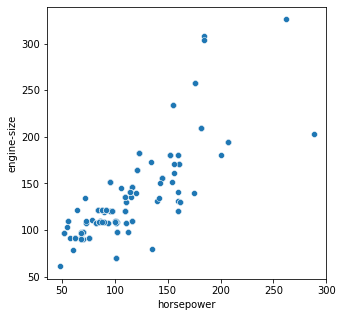

In [18]:
# plot scatter plot to check correlation between engine size and horsepower
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'horsepower', y = 'engine-size', data = data)

Enigine size is highly correlated with horsepower. We can use this attribute for imputation.

For NaN values in "horsepower", engine size is 132, so we will use range between 130 and 135.

In [19]:
data[(data['engine-size'] >125) & (data['engine-size'] <135)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
117,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0
198,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420.0
199,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0


For given range of engine size, horsepower is between range 72 to 162. This is huge difference, when we consider horsepower variance. Let's check which other attributes affect "horsepower".

**we can observe that the turbo engine produces more power compare to std**

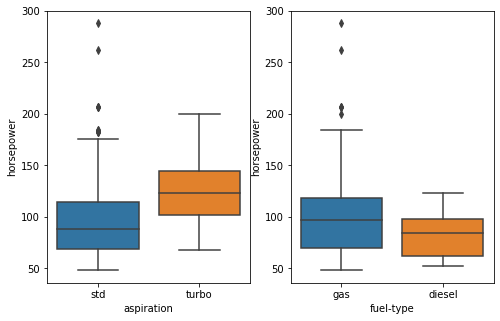

In [20]:
#let's check the horsepower with aspiration and fuel-type

features = ["aspiration","fuel-type"]
plt.figure(figsize = (8,5))
for i in enumerate (features):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(x = i[1],y = 'horsepower',data = data)


I have observed that this difference occur due to "aspiration" attribute, when we have std we got horsepower range between 72 to 111 and when we have turbo we got horsepower range between 140 to 162. Again horsepower affected by fuel type, for diesel we got very low horsepower = 72.

In [21]:
data[((data['fuel-type'] == 'gas') & (data['aspiration'] == 'std')) &
     ((data['engine-size'] >125) & (data['engine-size'] <135))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0


Now, for NaN values we have fuel type = gas, aspiration = std and engine size = 132 i.e., between 125 to 135, we have horsepower 111 for engine size = 130. from observations we can impute NaN values with values much closer to greater than 111 

In [22]:
# from above observations replace missing value with 113

data["horsepower"].replace(np.nan, 113, inplace=True)

**Fill missing values in "peak-rpm" column**

In [23]:
data[data['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,113.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,113.0,NaN,23,31,9895.0


In [24]:
# check correlation with other numerical attributes

data[data.columns[1:]].corr()['peak-rpm'][:-1]

normalized-losses    0.264597
wheel-base          -0.361052
length              -0.287325
width               -0.219957
height              -0.322272
curb-weight         -0.266306
engine-size         -0.244618
bore                -0.264269
stroke              -0.071493
compression-ratio   -0.436221
horsepower           0.130971
peak-rpm             1.000000
city-mpg            -0.113788
highway-mpg         -0.054257
Name: peak-rpm, dtype: float64

Numerical columns are not correlated with peak-rpm, therefore we can't use them for predicting NaN value in peak-rpm attribute

Let's check what relation we can find with categorical attributes.

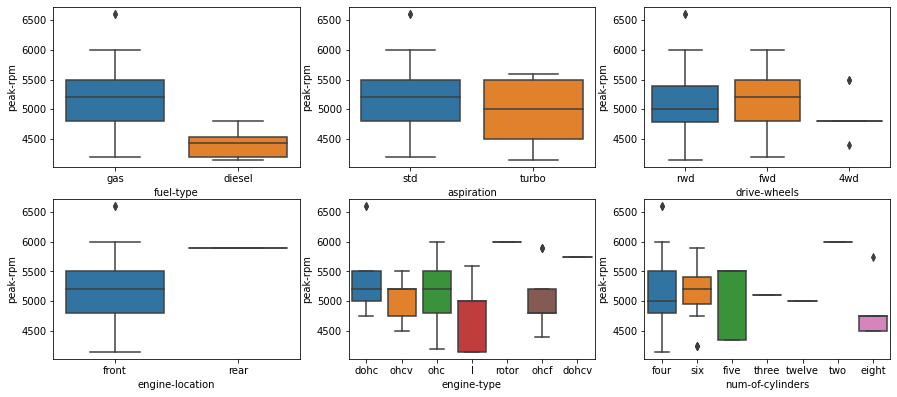

In [25]:
Features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders"]
plt.figure(figsize = (15,10))
for i in enumerate (Features):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x = i[1],y = 'peak-rpm',data = data)


From the above observation the peak-rpm values ranges in between 4800 to 5500

In [26]:
# getting mean based on above observed conditions
rpm_mean = data[(data['fuel-type'] == 'gas') & (data['aspiration'] == 'std') & (data['drive-wheels']== 'fwd') & (data['engine-location'] == 'front') 
& (data['engine-type'] == 'ohc') & (data['num-of-cylinders'] == 'four') & (data['fuel-system'] == 'mpfi')]['peak-rpm'].mean()

rpm_mean


5108.823529411765

We got the mean value as 5108.82.. Let's round it to 5100

In [27]:
# from above observations replace missing value with 5100

data["peak-rpm"].replace(np.nan, 5100, inplace=True)

**Fill missing values in "bore" column**

In [28]:
data[data['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [29]:
data.iloc[55:59,10:17]

,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size
55,169.0,65.7,49.6,2380,rotor,two,70
56,169.0,65.7,49.6,2380,rotor,two,70
57,169.0,65.7,49.6,2385,rotor,two,70
58,169.0,65.7,49.6,2500,rotor,two,80


In [30]:
data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

Observations:
1.   For the engine-type = 'rotor' all the values of 'bore' are nan.
2.   The rows 55,56,57 all values are same except the 'price' feature.
     so,we can drop the duplicate rows.
3.   Most importantly, **the rotary engines don't have bore and stroke**.
     we will use other attributes to fill the nan values.

In [31]:
# droping duplicates
data.drop([55,56], axis=0, inplace=True)

In [32]:
data[data.columns[1:]].corr()['bore'][:-1]

normalized-losses   -0.036167
wheel-base           0.490378
length               0.607480
width                0.559204
height               0.176195
curb-weight          0.649045
engine-size          0.594090
bore                 1.000000
stroke              -0.055909
compression-ratio    0.005203
horsepower           0.577528
peak-rpm            -0.264045
city-mpg            -0.594584
highway-mpg         -0.594572
Name: bore, dtype: float64

From the above we can see that Numerical columns has less correlation with 'bore'. so let's try with object columns.

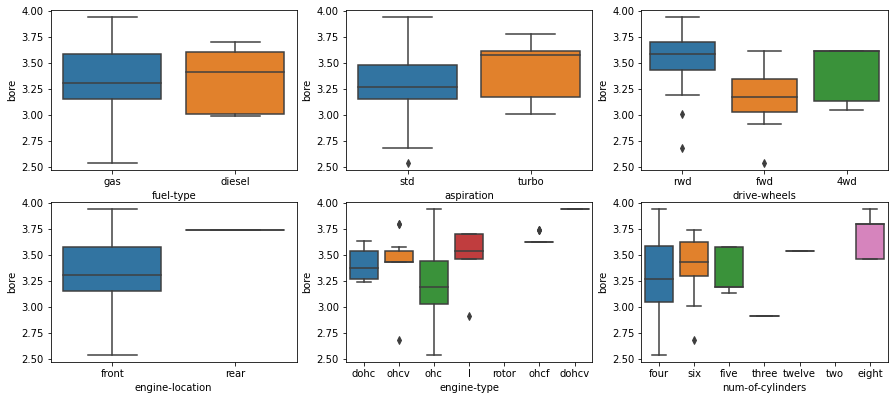

In [33]:
Features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders"]
plt.figure(figsize = (15,10))
for i in enumerate (Features):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x = i[1],y = 'bore',data = data)

In [34]:
# getting most frequently value by using mode()
bore_mode = data[(data['fuel-type'] == 'gas') & (data['aspiration'] == 'std') 
& ((data['bore'] >= 3.30) & (data['bore'] <= 3.60)) & (data['make'] == 'mazda')]['bore'].mode()

print(bore_mode)

0    3.39
dtype: float64


In [35]:
# from above observations replacing missing value with 3.39
data['bore'].replace(np.nan, 3.39, inplace = True)

**Fill missing values in "stroke" column**

In [36]:
data[data['stroke'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.39,NaN,9.4,135.0,6000.0,16,23,15645.0


In [37]:
# check correlation with other numerical attributes
data[data.columns[1:]].corr()['stroke'][:-1]

normalized-losses    0.065627
wheel-base           0.161477
length               0.129739
width                0.182956
height              -0.056999
curb-weight          0.168929
engine-size          0.206675
bore                -0.055909
stroke               1.000000
compression-ratio    0.186170
horsepower           0.092842
peak-rpm            -0.070322
city-mpg            -0.042906
highway-mpg         -0.044528
Name: stroke, dtype: float64

Numerical columns are not correlated with "stroke", therefore we can't use for prediction NaN value in "stroke" attribute. Let's check what relation we can find with categorical attributes.

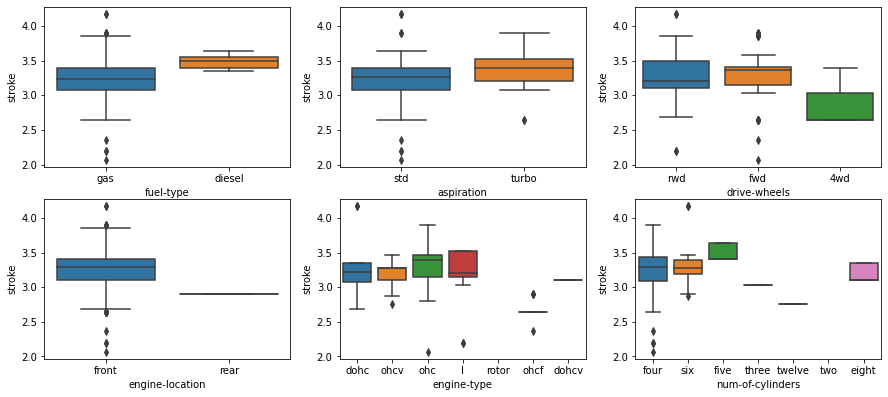

In [38]:
Features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders"]
plt.figure(figsize = (15,10))
for i in enumerate (Features):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x = i[1],y = 'stroke',data = data)

In [39]:
stroke_mode = data[((data['stroke'] >= 3.1) & (data['stroke'] < 3.4)) & (data['fuel-type'] == 'gas') & (data['aspiration'] == 'std') 
& (data['make'] == 'mazda')]['stroke'].mode()

stroke_mode


0    3.15
1    3.39
dtype: float64

In [40]:
#since we got two mode values let us apply mean on them 
stroke_mean = stroke_mode.mean()
print(stroke_mean)

3.27


In [41]:
# from above observations replacing missing value with 3.27
data["stroke"].replace(np.nan, 3.27, inplace=True)

**Fill missing values in "Normalized losses" column**

In [42]:
# get all rows with null values in 'normalized-losses' column
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [43]:
# check correlation with other numerical attributes
data[data.columns[1:]].corr()['normalized-losses'][:-1]

normalized-losses    1.000000
wheel-base          -0.069276
length               0.026117
width                0.104965
height              -0.424930
curb-weight          0.122004
engine-size          0.186115
bore                -0.032582
stroke               0.066467
compression-ratio   -0.131334
horsepower           0.295418
peak-rpm             0.253048
city-mpg            -0.248245
highway-mpg         -0.200520
Name: normalized-losses, dtype: float64

Numerical columns are not correlated with "normalized-losses", therefore we can't use for imputing missing values in "normalized-losses" attribute.

We will use either mean, mode, or medain by using distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


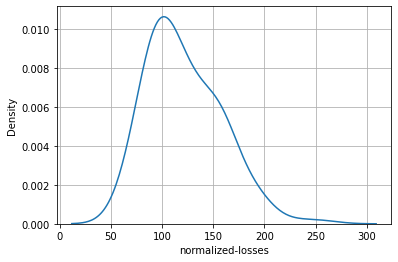

In [44]:
#plotting kde plot to check the ditribution
plt.grid()
sns.kdeplot(data['normalized-losses'], bw=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


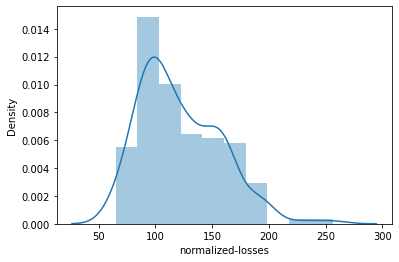

In [45]:
sns.distplot(data['normalized-losses'])

In [46]:
data['normalized-losses'].mean()

121.65432098765432

In [47]:
loss_median = data['normalized-losses'].median()
loss_median

115.0

In [48]:
data['normalized-losses'].replace(np.nan, 115.0, inplace = True)

In [49]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

**Handle missing values in "price " column**

we have price column with missing values. so we will take out these rows currently. We can use these rows for test data.

In [50]:
data[data['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,115.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,115.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [51]:
data.shape

(203, 26)

In [52]:
# drop whole row with NaN in "price" column
data.dropna(subset = ["price"], axis=0, inplace=True)

# reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [53]:
data.shape

(199, 26)

In [54]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Missing values are handled.

In [55]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.819095,120.417085,98.832161,174.253266,65.890955,53.808543,2557.432161,127.447236,3.331307,3.257035,10.171960,103.517588,5108.542714,25.261307,30.763819,13225.341709
std,1.242122,32.137519,6.086686,12.373104,2.111971,2.423887,519.599899,41.359058,0.269488,0.317642,4.024401,37.565276,472.183181,6.402498,6.805338,7984.876506
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,99.500000,94.500000,166.550000,64.100000,52.000000,2157.000000,98.000000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10245.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [56]:
# taking numerical features for plotting scatter plot
num_features = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight',
                'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

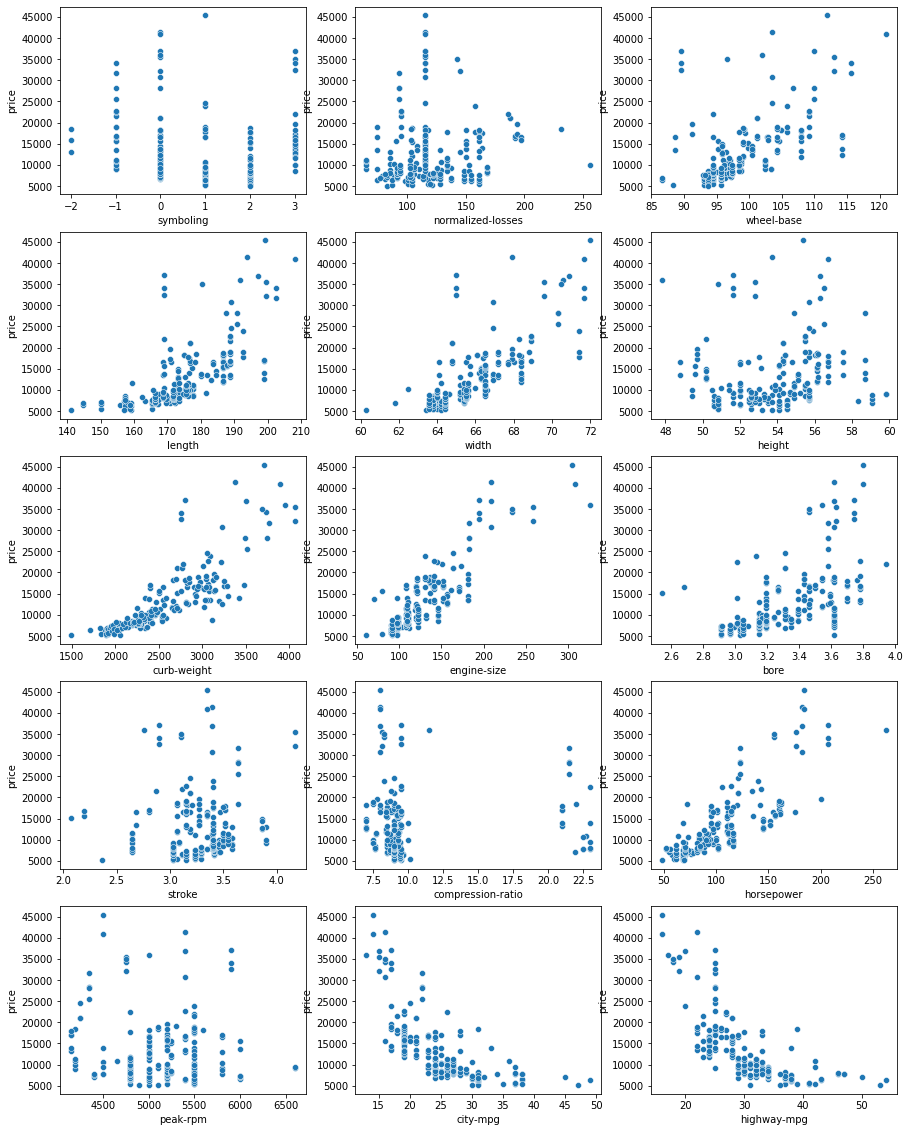

In [57]:
# scatter plot for all numerical attributes
plt.figure(figsize = (15,20))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'price',data = data)

Obserrvations from the above figure:

Most of the columns are showing positive linear relation-ship with the price attribute and some of them are showing negative linear relation-ship.

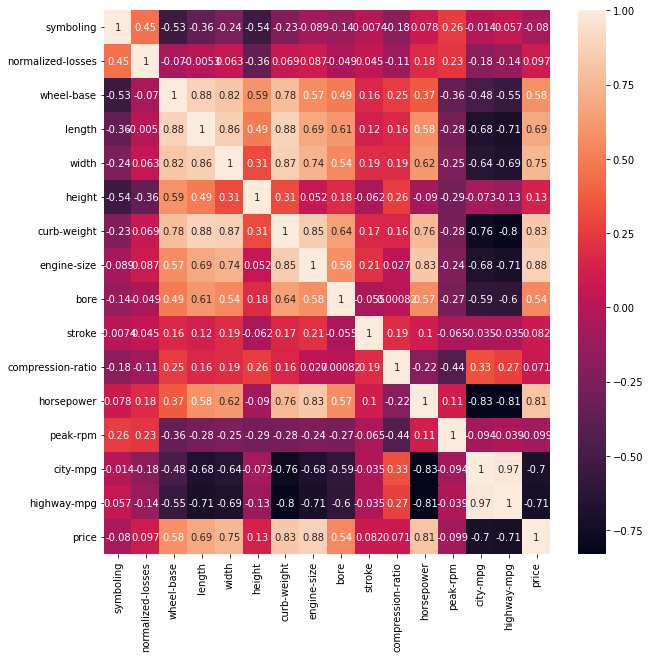

In [58]:
# correlation of numerical attributes
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

observations:

1.The numerical features "length, width, curb-weight, engine-size and horsepower are having good correlation with "price" feature.From this we can say **if the size of the car and horsepower increases then price also increases.**

2.And also we can say the features city-mpg, highway-mpg are **negatively correlated with price** because mileage is highly considered for buying the cars.


**Analysis of categorical attributes**

In [59]:
# taking categorical features for plotting box plot
cat_features = ['fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','num-of-cylinders', 'fuel-system']

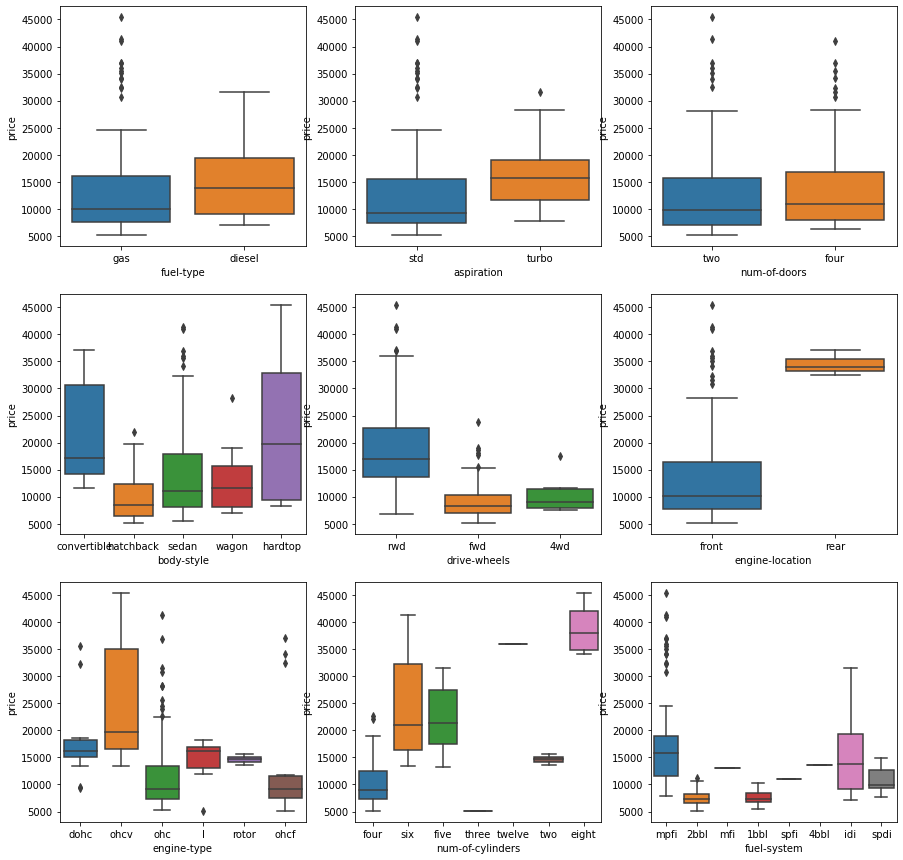

In [60]:
plt.figure(figsize = (15,15))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'price',data = data)

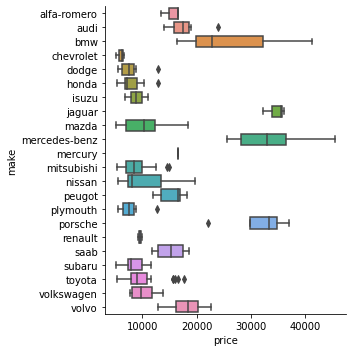

In [61]:
sns.catplot(y="make", x="price", kind="box", data=data)

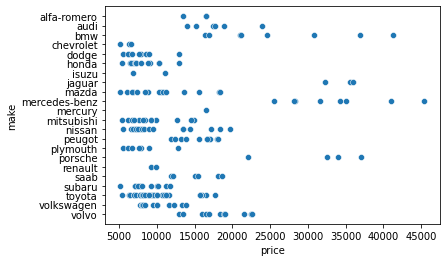

In [62]:
sns.scatterplot(y = 'make', x = 'price',data = data)

**Observations on categorical attributes:**

1.There is a huge price difference in front and rear engine-location.
 
2.From above plots we observe that rear wheel drive, rear engine location, eight number of cylinders, mercedes-benz, jaguar and porsche make vehicles are costier than others.

3.We observe that data has some outliears but we are not removing it because we have very small data.

Encoding the categorical features

In [63]:
categorical_features = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
                'engine-location','engine-type','num-of-cylinders','fuel-system']

In [64]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

In [65]:
OE = OrdinalEncoder()
OHE = OneHotEncoder()
LE = LabelEncoder()

In [66]:
data['make'] = OE.fit_transform(data[['make']])

trans_aspiration = OHE.fit_transform(data[['aspiration']]).toarray()
data[['aspiration_std','aspiration_turbo']] = pd.DataFrame(trans_aspiration)

trans_fuel_type = OHE.fit_transform(data[['fuel-type']]).toarray()
data[['fuel_gas','fuel_diesel']] = pd.DataFrame(trans_fuel_type)

trans_doors = OHE.fit_transform(data[['num-of-doors']]).toarray()
data[['two_doors','four_doors']] = pd.DataFrame(trans_doors)

data['body-style'] = OE.fit_transform(data[['body-style']])
data['drive-wheels'] = OE.fit_transform(data[['drive-wheels']])

trans_engine_loc = OHE.fit_transform(data[['engine-location']]).toarray()
data[['engine_front','engine_rear']] = pd.DataFrame(trans_engine_loc)

data['engine-type'] = OE.fit_transform(data[['engine-type']])
data['num-of-cylinders'] = OE.fit_transform(data[['num-of-cylinders']])
data['fuel-system'] = OE.fit_transform(data[['fuel-system']])

In [67]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,highway-mpg,price,aspiration_std,aspiration_turbo,fuel_gas,fuel_diesel,two_doors,four_doors,engine_front,engine_rear
0,3,115.0,0.0,gas,std,two,0.0,2.0,front,88.6,...,27,13495.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,3,115.0,0.0,gas,std,two,0.0,2.0,front,88.6,...,27,16500.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,115.0,0.0,gas,std,two,2.0,2.0,front,94.5,...,26,16500.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2,164.0,1.0,gas,std,four,3.0,1.0,front,99.8,...,30,13950.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,2,164.0,1.0,gas,std,four,3.0,0.0,front,99.4,...,22,17450.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95.0,21.0,gas,std,four,3.0,2.0,front,109.1,...,28,16845.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
195,-1,95.0,21.0,gas,turbo,four,3.0,2.0,front,109.1,...,25,19045.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
196,-1,95.0,21.0,gas,std,four,3.0,2.0,front,109.1,...,23,21485.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
197,-1,95.0,21.0,diesel,turbo,four,3.0,2.0,front,109.1,...,27,22470.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [68]:
data.drop(columns = ['fuel-type','aspiration','num-of-doors','engine-location'],axis = 1,inplace = True)

In [69]:
data.head()

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,highway-mpg,price,aspiration_std,aspiration_turbo,fuel_gas,fuel_diesel,two_doors,four_doors,engine_front,engine_rear
0,3,115.0,0.0,0.0,2.0,88.6,168.8,64.1,48.8,2548,...,27,13495.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,3,115.0,0.0,0.0,2.0,88.6,168.8,64.1,48.8,2548,...,27,16500.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1,115.0,0.0,2.0,2.0,94.5,171.2,65.5,52.4,2823,...,26,16500.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2,164.0,1.0,3.0,1.0,99.8,176.6,66.2,54.3,2337,...,30,13950.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,2,164.0,1.0,3.0,0.0,99.4,176.6,66.4,54.3,2824,...,22,17450.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [70]:
data.shape

(199, 30)

splitting the data ino X and y

In [71]:
y = data.pop('price')
X = data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 4)

**Data Standardization:**

Standardization data means bringing all attributes on same scale with mean = 0 and standard deviation = 1

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model building

Importing the regression models from sklearn library

In [75]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [76]:
#creating objects for each model

lr = LinearRegression()
sgd = SGDRegressor()
ridge = Ridge()
lasso = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
knr = KNeighborsRegressor()

In [77]:
#importing metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


**1.LinearRegressor**

In [78]:
lr.fit(X_train, y_train)
print('train score : ',lr.score(X_train, y_train))
print('test score : ',lr.score(X_test, y_test))

train score :  0.8992293531147145
test score :  0.8382550729090107


In [79]:
lr_y_pred = lr.predict(X_test)
print('MSE = ',mean_squared_error(lr_y_pred, y_test))
print('MAE = ',mean_absolute_error(lr_y_pred, y_test))
print('R2 = ',r2_score(lr_y_pred, y_test))

MSE =  9711247.242831815
MAE =  2520.4443342999707
R2 =  0.8083871812632415


We got the train score = 0.899, test score = 0.838 and the r2-score = 0.808.

The performance of the linear regression model is good.

**2.SGDRegressor**

In [80]:
sgd.fit(X_train,y_train)
print('train score : ',sgd.score(X_train, y_train))
print('test score : ',sgd.score(X_test, y_test))

train score :  0.8945562142876524
test score :  0.8654754572352963


In [81]:
sgd_y_pred = sgd.predict(X_test)
print('MSE = ',mean_squared_error(sgd_y_pred, y_test))
print('MAE = ',mean_absolute_error(sgd_y_pred, y_test))
print('R2 = ',r2_score(sgd_y_pred, y_test))

MSE =  8076921.598178014
MAE =  2226.006496844714
R2 =  0.8344789123203953


SchocasticGradientDescent is an Generic optimization method which gives optimized solutions.

We got the train score = 0.894, test score = 0.865 and  the r2 score = 0.834.

compare to normal equation linear regression model it gives better scores on test data and r2 scores.

**3.Ridge**

In [82]:
ridge.fit(X_train,y_train)
print('train score : ',ridge.score(X_train, y_train))
print('test score : ',ridge.score(X_test, y_test))

train score :  0.8988856654932252
test score :  0.8472645758692198


In [83]:
ridge_y_pred = ridge.predict(X_test)
print('MSE = ',mean_squared_error(ridge_y_pred, y_test))
print('MAE = ',mean_absolute_error(ridge_y_pred, y_test))
print('R2 = ',r2_score(ridge_y_pred, y_test))

MSE =  9170312.127553696
MAE =  2423.579621689839
R2 =  0.8157788932374495


Ridge Regression is a modified version of Linear Regression. In ridge regression we use regularization technique.

We got the train score = 0.898, test score = 0.847 and the r2 score = 0.815.

There is no much improvement in the test and r2 scores compared to linear regression model.

**4.Lasso**

Ridge and Lasso regressions are almost similar only difference is Ridge regression uses L2 regularization and Lasso regression uses L1 regularization.

The differences between L1 and L2 regularization: L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights.

In [84]:
lasso.fit(X_train,y_train)
print('train score : ',lasso.score(X_train, y_train))
print('test score : ',lasso.score(X_test, y_test))

train score :  0.8992180412058187
test score :  0.8399792324688674


In [85]:
lasso_y_pred = lasso.predict(X_test)
print('MSE = ',mean_squared_error(lasso_y_pred, y_test))
print('MAE = ',mean_absolute_error(lasso_y_pred, y_test))
print('R2 = ',r2_score(lasso_y_pred, y_test))

MSE =  9607727.83067466
MAE =  2502.7504128058645
R2 =  0.8099358766770286


Lasso Regression is a modified version of Linear Regression. In Lasso regression we use regularization technique.

We got the train score = 0.899, test score = 0.839 and the r2 score = 0.809.

There is no improvement in the test and r2 scores compared to linear regression model.

**5.DecisionTreeRegressor**

In [86]:
dtr.fit(X_train,y_train)
print('train score : ',dtr.score(X_train, y_train))
print('test score : ',dtr.score(X_test, y_test))

train score :  0.9995490317655161
test score :  0.83171869923016


In [87]:
dtr_y_pred = dtr.predict(X_test)
print('MSE = ',mean_squared_error(dtr_y_pred, y_test))
print('MAE = ',mean_absolute_error(dtr_y_pred, y_test))
print('R2 = ',r2_score(dtr_y_pred, y_test))

MSE =  10103694.425
MAE =  2020.475
R2 =  0.8236090405721875


Here we got a very good train score = 0.999,comparitively very low test score = 0.831 and the r2 score = 0.823. This means our model is slightly tends to overfitting.

Overfitting means that the model performs well on the training data, but it does not generalize well, means it not performs well on test data.


**6.RandomForestRegressor**

In [88]:
rfr.fit(X_train,y_train)
print('train score : ',rfr.score(X_train, y_train))
print('test score : ',rfr.score(X_test, y_test))

train score :  0.9908891464982104
test score :  0.8837177173256192


In [89]:
rfr_y_pred = rfr.predict(X_test)
print('MSE = ',mean_squared_error(rfr_y_pred, y_test))
print('MAE = ',mean_absolute_error(rfr_y_pred, y_test))
print('R2 = ',r2_score(rfr_y_pred, y_test))

MSE =  6981647.074325338
MAE =  1671.4703624999995
R2 =  0.8673655097151256


In RandomForestRegressor we got a very good train score = 0.990 and good test score = 0.883 and the r2-score = 0.867.

There is much improvement in the scores compare to linear,sgd,ridge and lasso regresssons.

**7.SVR**

In [90]:
svr.fit(X_train,y_train)
print('train score : ',svr.score(X_train, y_train))
print('test score : ',svr.score(X_test, y_test))

train score :  -0.12833123464898955
test score :  -0.17628834151382922


In [91]:
svr_y_pred = svr.predict(X_test)
print('MSE = ',mean_squared_error(svr_y_pred, y_test))
print('MAE = ',mean_absolute_error(svr_y_pred, y_test))
print('R2 = ',r2_score(svr_y_pred, y_test))

MSE =  70624947.06171075
MAE =  5719.8492761314355
R2 =  -413243.28581683384


For SVR model we got train score = -0.128, test score = -0.176 and r2 score = -413243.285 which is very very less compare to all other regression models.


**8.KNeighborsRegessor**

In [92]:
knr.fit(X_train,y_train)
print('train score : ',knr.score(X_train, y_train))
print('test score : ',knr.score(X_test, y_test))

train score :  0.8692648502136817
test score :  0.8626023545465178


In [93]:
knr_y_pred = knr.predict(X_test)
print('MSE = ',mean_squared_error(knr_y_pred, y_test))
print('MAE = ',mean_absolute_error(knr_y_pred, y_test))
print('R2 = ',r2_score(knr_y_pred, y_test))

MSE =  8249424.137
MAE =  2009.2849999999999
R2 =  0.790119770193037


In KNeighborsRegressor we got train score = 0.869, test score = 0.862 and r2 score = 0.790.

By Comparing all the models we can conclude that the SGDRegressor, Ridge and RandomForestRegressor are good to go for final model development by tuning some parameters.

In [94]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Assesing the models

**1.ridge**

In [95]:
params_ridge = {'alpha':[3.0,6.0,9.0,12.0,15.0],'max_iter':[500,1000,1500,2000],'solver':['svd','sag','saga']}
ridge_cv = GridSearchCV(ridge, param_grid = params_ridge)

In [96]:
ridge_cv.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [3.0, 6.0, 9.0, 12.0, 15.0],
                         'max_iter': [500, 1000, 1500, 2000],
                         'solver': ['svd', 'sag', 'saga']})

In [97]:
print('Train score :',ridge_cv.score(X_train,y_train))
print('Test_score :',ridge_cv.score(X_test,y_test))

Train score : 0.8947755600560006
Test_score : 0.8610319994479118


In [98]:
y_pred_ridge = ridge_cv.predict(X_test)
print('r2-score for ridge:', r2_score(y_pred_ridge,y_test))

r2-score for ridge: 0.8192730446217975


In [99]:
ridge_cv.best_params_

{'alpha': 12.0, 'max_iter': 1500, 'solver': 'sag'}

**2.SgdRegressor**

In [100]:
params_sgd = {'loss': ['squared_error','huber'], 'penalty':['l1','l2'], 'alpha':[0.001, 0.01, 0.1,1],'max_iter':[1000,2000],'learning_rate':['constant', 'optimal', 'invscaling']}
sgd_cv = GridSearchCV(sgd, param_grid = params_sgd)

In [ ]:
sgd_cv.fit(X_train, y_train)

In [102]:
print('Train score :',sgd_cv.score(X_train,y_train))
print('Test_score :',sgd_cv.score(X_test,y_test))

Train score : 0.8919306208588592
Test_score : 0.8622343951898805


In [103]:
y_pred_sgd = sgd_cv.predict(X_test)
print('r2-score for sgd:', r2_score(y_pred_sgd,y_test))

r2-score for sgd: 0.8123378188858601


In [104]:
sgd_cv.best_params_

{'alpha': 0.1,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 2000,
 'penalty': 'l2'}

**3.RandomForestRegressor**

In [105]:
params_rfr = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, None],'max_features': ['auto', 'sqrt'], 
 'min_samples_leaf': [2,3,4],'min_samples_split': [2,3,4,5],'n_estimators': [200, 400, 600,800]}

rfr_cv = RandomizedSearchCV(rfr, param_distributions= params_rfr)

In [106]:
rfr_cv.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [200, 400, 600, 800]})

In [107]:
print('Train score :',rfr_cv.score(X_train,y_train))
print('Test_score :',rfr_cv.score(X_test,y_test))

Train score : 0.9887770098797561
Test_score : 0.9006880647477015


In [108]:
y_pred_rfr = rfr_cv.predict(X_test)
print('r2 score for rfr:', r2_score(y_pred_rfr,y_test))

r2 score for rfr: 0.875549918004668


In [109]:
rfr_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

**4.DecisionTreeRegressor**

In [110]:
params_dtr = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_depth':[6,7,8,9],'splitter':['best','random'],'min_impurity_decrease':(0.001,0.01,0.1,1,10),'min_samples_leaf':(3,4,5)}
dtr_cv = GridSearchCV(dtr, param_grid = params_dtr)

In [111]:
dtr_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [6, 7, 8, 9],
                         'min_impurity_decrease': (0.001, 0.01, 0.1, 1, 10),
                         'min_samples_leaf': (3, 4, 5),
                         'splitter': ['best', 'random']})

In [112]:
print('Train score :',dtr_cv.score(X_train,y_train))
print('Test_score :',dtr_cv.score(X_test,y_test))

Train score : 0.9777512239044767
Test_score : 0.8499736103329637


In [113]:
y_pred_dtr = dtr_cv.predict(X_test)
print('r2 score for dtr:', r2_score(y_pred_dtr,y_test))

r2 score for dtr: 0.8421808103489876


In [114]:
rfr_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

From the above observations RandomForestRegressor gives high r2-score.

so we can construct our final_model using RandomForestRegressor.

#**Final_model:** RandomForestRegressor

In [115]:
print((X.shape),(y.shape))

(199, 29) (199,)


In [116]:
final_model_rfr = RandomForestRegressor(n_estimators =600, min_samples_split = 3, min_samples_leaf = 2, max_features = 'sqrt',
                                        max_depth = 30,bootstrap = False)

In [117]:
final_model_rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=3,
                      n_estimators=600)

In [118]:
print('Train score:', final_model_rfr.score(X_train,y_train))
print('Test score:',  final_model_rfr.score(X_test,y_test))

Train score: 0.9889145803016852
Test score: 0.9018858138503554


In [119]:
y_pred_final = final_model_rfr.predict(X_test)

In [120]:
#test scores of final model

print('r2-score:', r2_score(y_pred_final,y_test))
print('MAE is :', mean_absolute_error(y_pred_final,y_test))
print('MSE is :', mean_squared_error(y_pred_final,y_test))

r2-score: 0.8764262394966555
MAE is : 1605.1040393657756
MSE is : 5890825.368466871


#conclusion

By comparing all the models, we conclude that the Random Forest Regression model is the best model to be able to predict price from our dataset.